# Partition Based Clustering

In [137]:
import pandas as pd
import numpy as np
import sklearn
from pyclustertend import hopkins
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt

# Import preprocessed data
ori_data = pd.read_csv("fetal_health.csv")
data = pd.read_csv("second_dataset.csv")
X = data
X_data, y = data.drop(columns=['fetal_health'])[ori_data.columns[:-1]], data['fetal_health'] 
X = scale(X_data)
# y = y.map({1: "Normal", 2: "Suspect", 3: "Pathological" })



/Users/wdgao/opt/anaconda3/envs/AML/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:179: RuntimeWarning: Mean of empty slice
  mean_ = np.nanmean(X, axis)
/Users/wdgao/opt/anaconda3/envs/AML/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/wdgao/opt/anaconda3/envs/AML/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:187: RuntimeWarning: Mean of empty slice
  mean_1 = np.nanmean(Xr, axis=0)
/Users/wdgao/opt/anaconda3/envs/AML/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/wdgao/opt/anaconda3/envs/AML/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:204: RuntimeWarning: Mean of empt

In [167]:
ori_data = pd.read_csv("fetal_health.csv")
ori_X = ori_data
ori_X_data, y = ori_data.iloc[:-1, :], data['fetal_health'] 
ori_X_data = ori_X_data.drop(columns=['fetal_health'])
ori_X = scale(ori_X_data)

In [168]:
ori_X_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,140.0,0.000,0.0,0.005,0.001,0.0,0.0,77.0,0.7,17.0,...,31.0,124.0,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0
2121,140.0,0.000,0.0,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.0,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.0,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0


In [138]:
X_data.drop(columns=['fetal_movement'])

,baseline value,accelerations,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,133.0,0.005259,0.005004,0.002103,0.000421,0.002945,67.809444,0.976530,0.000000,24.684967,133.950,59.050,193.0,4,0,141.0,133.246214,138.0,21.593078,-1
1,150.0,0.003988,0.007298,0.001259,0.001049,0.001889,66.357102,1.077250,0.000000,16.104992,156.750,67.250,224.0,3,0,150.0,144.826520,151.0,25.375413,-1
2,116.5,0.004600,0.002669,0.000460,0.000460,0.000920,57.037718,0.993940,15.850465,27.480447,90.725,71.775,162.5,3,0,128.0,121.365727,125.5,16.784663,-1
3,155.0,0.000000,0.000000,0.000000,0.000960,0.000960,69.788230,1.129202,27.246283,7.843678,103.075,62.925,166.0,3,0,155.0,134.798404,139.0,21.182299,-1
4,110.0,0.004618,0.004671,0.000770,0.000513,0.002309,59.517701,1.221868,0.000000,46.041337,165.775,62.725,228.5,4,0,118.0,118.343040,120.0,18.609329,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,117.0,0.003073,0.003776,0.000000,0.000000,0.000000,69.292548,0.850013,0.000000,0.000000,103.550,55.950,159.5,3,0,121.0,124.927289,122.5,10.078590,0
540,124.0,0.003831,0.003728,0.001676,0.001197,0.002634,64.434070,1.307819,0.000000,16.593466,172.900,60.100,233.0,3,0,125.0,123.757258,126.0,19.000741,0
541,156.0,0.002501,0.002304,0.000278,0.001389,0.001111,57.139881,1.199819,0.000000,31.337830,75.525,106.475,182.0,2,0,156.0,153.592908,154.5,9.525377,0
542,120.0,0.003612,0.005646,0.001667,0.000556,0.000834,61.126545,1.014077,0.000000,27.866858,111.150,55.850,167.0,4,0,123.0,114.580057,121.0,19.385493,-1


In [139]:
column_means = X_data.mean()
X_data = X_data.fillna(column_means)

In [140]:
X_data = X_data.drop(columns=["fetal_movement"])

In [141]:
X_data.isna().any()

baseline value                                            False
accelerations                                             False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes                                False
histogram_mode                          

In [142]:
X_data_selected = X_data[["baseline value", "abnormal_short_term_variability", "mean_value_of_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability", "mean_value_of_long_term_variability", "light_decelerations", "severe_decelerations", "prolongued_decelerations"]]

In [143]:
X = scale(X_data)
y = y.map({1: "Normal", 2: "Suspect", 3: "Pathological" })

In [144]:
X

array([[-0.03284603,  0.60070684,  0.74354299, ...,  0.09462909,
         0.60374617, -0.64268032],
       [ 1.08597572,  0.06146069,  1.88359468, ...,  1.16838271,
         1.29380239, -0.64268032],
       [-1.11876126,  0.32130724, -0.41716315, ..., -0.93782631,
        -0.27350982, -0.64268032],
       ...,
       [ 1.48085398, -0.56972455, -0.59841717, ...,  1.45747022,
        -1.59790708,  0.99104909],
       [-0.8884156 , -0.09806965,  1.06253287, ..., -1.30951025,
         0.20099041, -0.64268032],
       [-0.69097647, -0.20996225, -1.01596474, ..., -2.50715851,
        -0.01399858,  2.62477849]])

## K-means Clustering

In [172]:
def kmeans_elbow_plot(X, ran):
    Sum_of_squared_distances = []
    for num_clusters in ran:
     kmeans = KMeans(n_clusters=num_clusters)
     kmeans.fit(X)
     Sum_of_squared_distances.append(kmeans.inertia_)
    plt.plot(ran,Sum_of_squared_distances,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Sum of squared distances/Inertia') 
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [177]:
def kmeans_silh_plot(X, ran):
    silhouette_avg = []
    for num_clusters in ran:
     kmeans = KMeans(n_clusters=num_clusters)
     kmeans.fit(X)
     cluster_labels = kmeans.labels_
     # silhouette score
     silhouette_avg.append(silhouette_score(X, cluster_labels))
    plt.plot(ran,silhouette_avg,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Silhouette score') 
    plt.title('Silhouette analysis For Optimal k')
    plt.show()

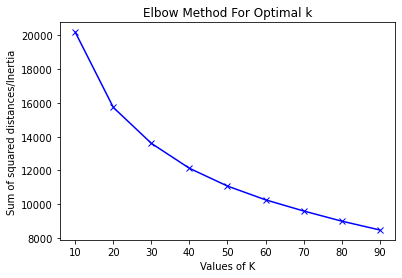

In [183]:
# original dataset elbow plot
kmeans_elbow_plot(ori_X, range(10, 100, 10))

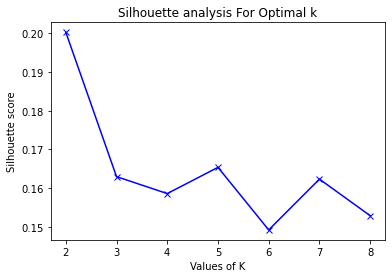

In [180]:
# original dataset silh plot
kmeans_silh_plot(ori_X, range(2, 9))

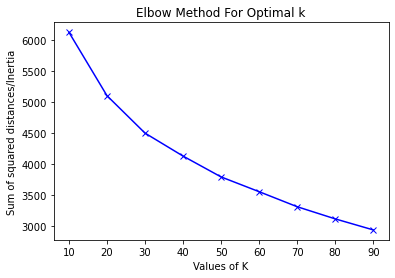

In [184]:
# secondary dataset elbow plot
kmeans_elbow_plot(X, range(10, 100, 10))

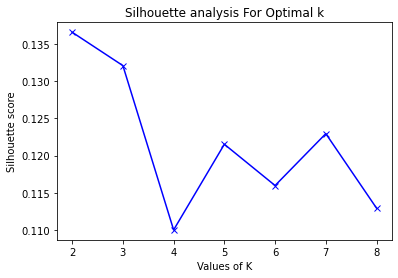

In [185]:
# secondary dataset silh plot
kmeans_silh_plot(X, range(2, 9))

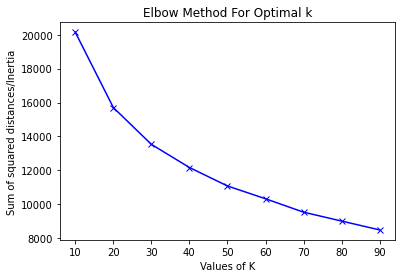

In [169]:
# original dataset
Sum_of_squared_distances_ori_data_set = []
K = range(10,100, 10)
for num_clusters in K:
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(ori_X)
 Sum_of_squared_distances_ori_data_set.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances_ori_data_set,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

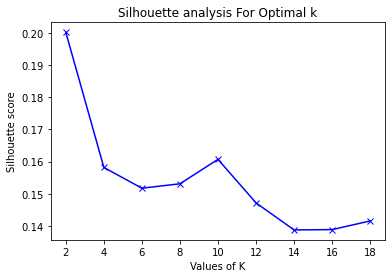

In [171]:
#original dataset
range_n_clusters = range(2, 20, 2)
silhouette_avg_ori = []
for num_clusters in range_n_clusters:
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(ori_X)
 cluster_labels = kmeans.labels_
 # silhouette score
 silhouette_avg_ori.append(silhouette_score(ori_X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg_ori,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

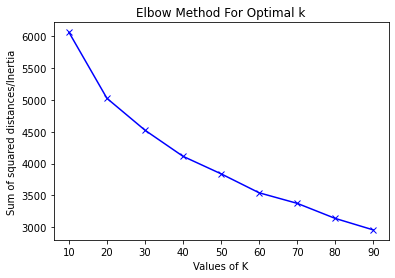

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Sum_of_squared_distances = []
K = range(10,100, 10)
for num_clusters in K:
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()


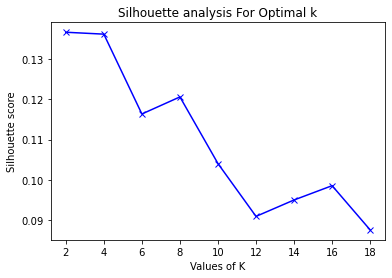

In [146]:
range_n_clusters = range(2, 20, 2)
silhouette_avg = []
for num_clusters in range_n_clusters:
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 cluster_labels = kmeans.labels_
 # silhouette score
 silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

## K-Medoids Clustering

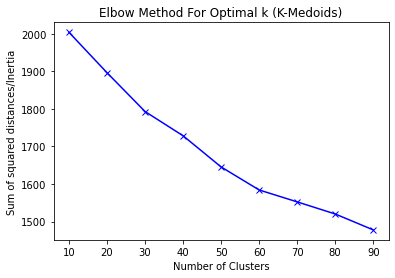

In [147]:
from sklearn_extra.cluster import KMedoids

ssr_kmedoids = []
kme_ranage = range(10, 100, 10)
for num_clusters in kme_ranage:
 kmedoids = KMedoids(n_clusters=num_clusters)
 kmedoids.fit(X)
 ssr_kmedoids.append(kmedoids.inertia_)
plt.plot(kme_ranage,ssr_kmedoids,'bx-')
plt.xlabel('Number of Clusters') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k (K-Medoids)')
plt.show()

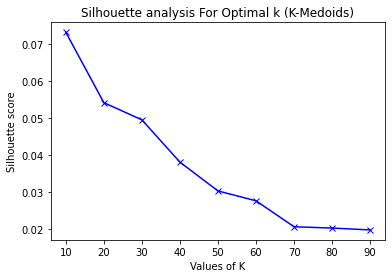

In [148]:
km_range_n_clusters = range(10, 100, 10)
km_silhouette_avg = []
for num_clusters in range_n_clusters:
 kmedoids = KMedoids(n_clusters=num_clusters)
 kmedoids.fit(X)
 cluster_labels = kmedoids.labels_
 # silhouette score
 km_silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(km_range_n_clusters,km_silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k (K-Medoids)')
plt.show()

## PAM Clustering

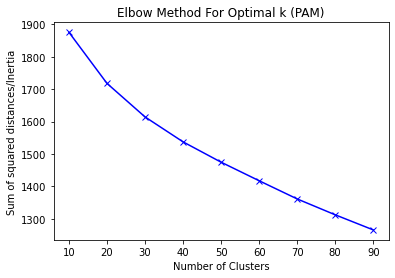

In [149]:
from sklearn_extra.cluster import KMedoids

ssr_kmedoids = []
kme_ranage = range(10, 100, 10)
for num_clusters in kme_ranage:
 kmedoids = KMedoids(n_clusters=num_clusters, method='pam')
 kmedoids.fit(X)
 ssr_kmedoids.append(kmedoids.inertia_)
plt.plot(kme_ranage,ssr_kmedoids,'bx-')
plt.xlabel('Number of Clusters') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k (PAM)')
plt.show()

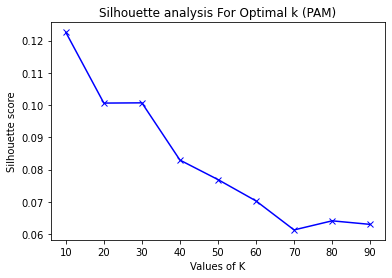

In [150]:
km_range_n_clusters = range(10, 100, 10)
km_silhouette_avg = []
for num_clusters in range_n_clusters:
 kmedoids = KMedoids(n_clusters=num_clusters, method='pam')
 kmedoids.fit(X)
 cluster_labels = kmedoids.labels_
 # silhouette score
 km_silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(km_range_n_clusters,km_silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k (PAM)')
plt.show()

## Agreements between TSNE clustering result and partition based clustering results.

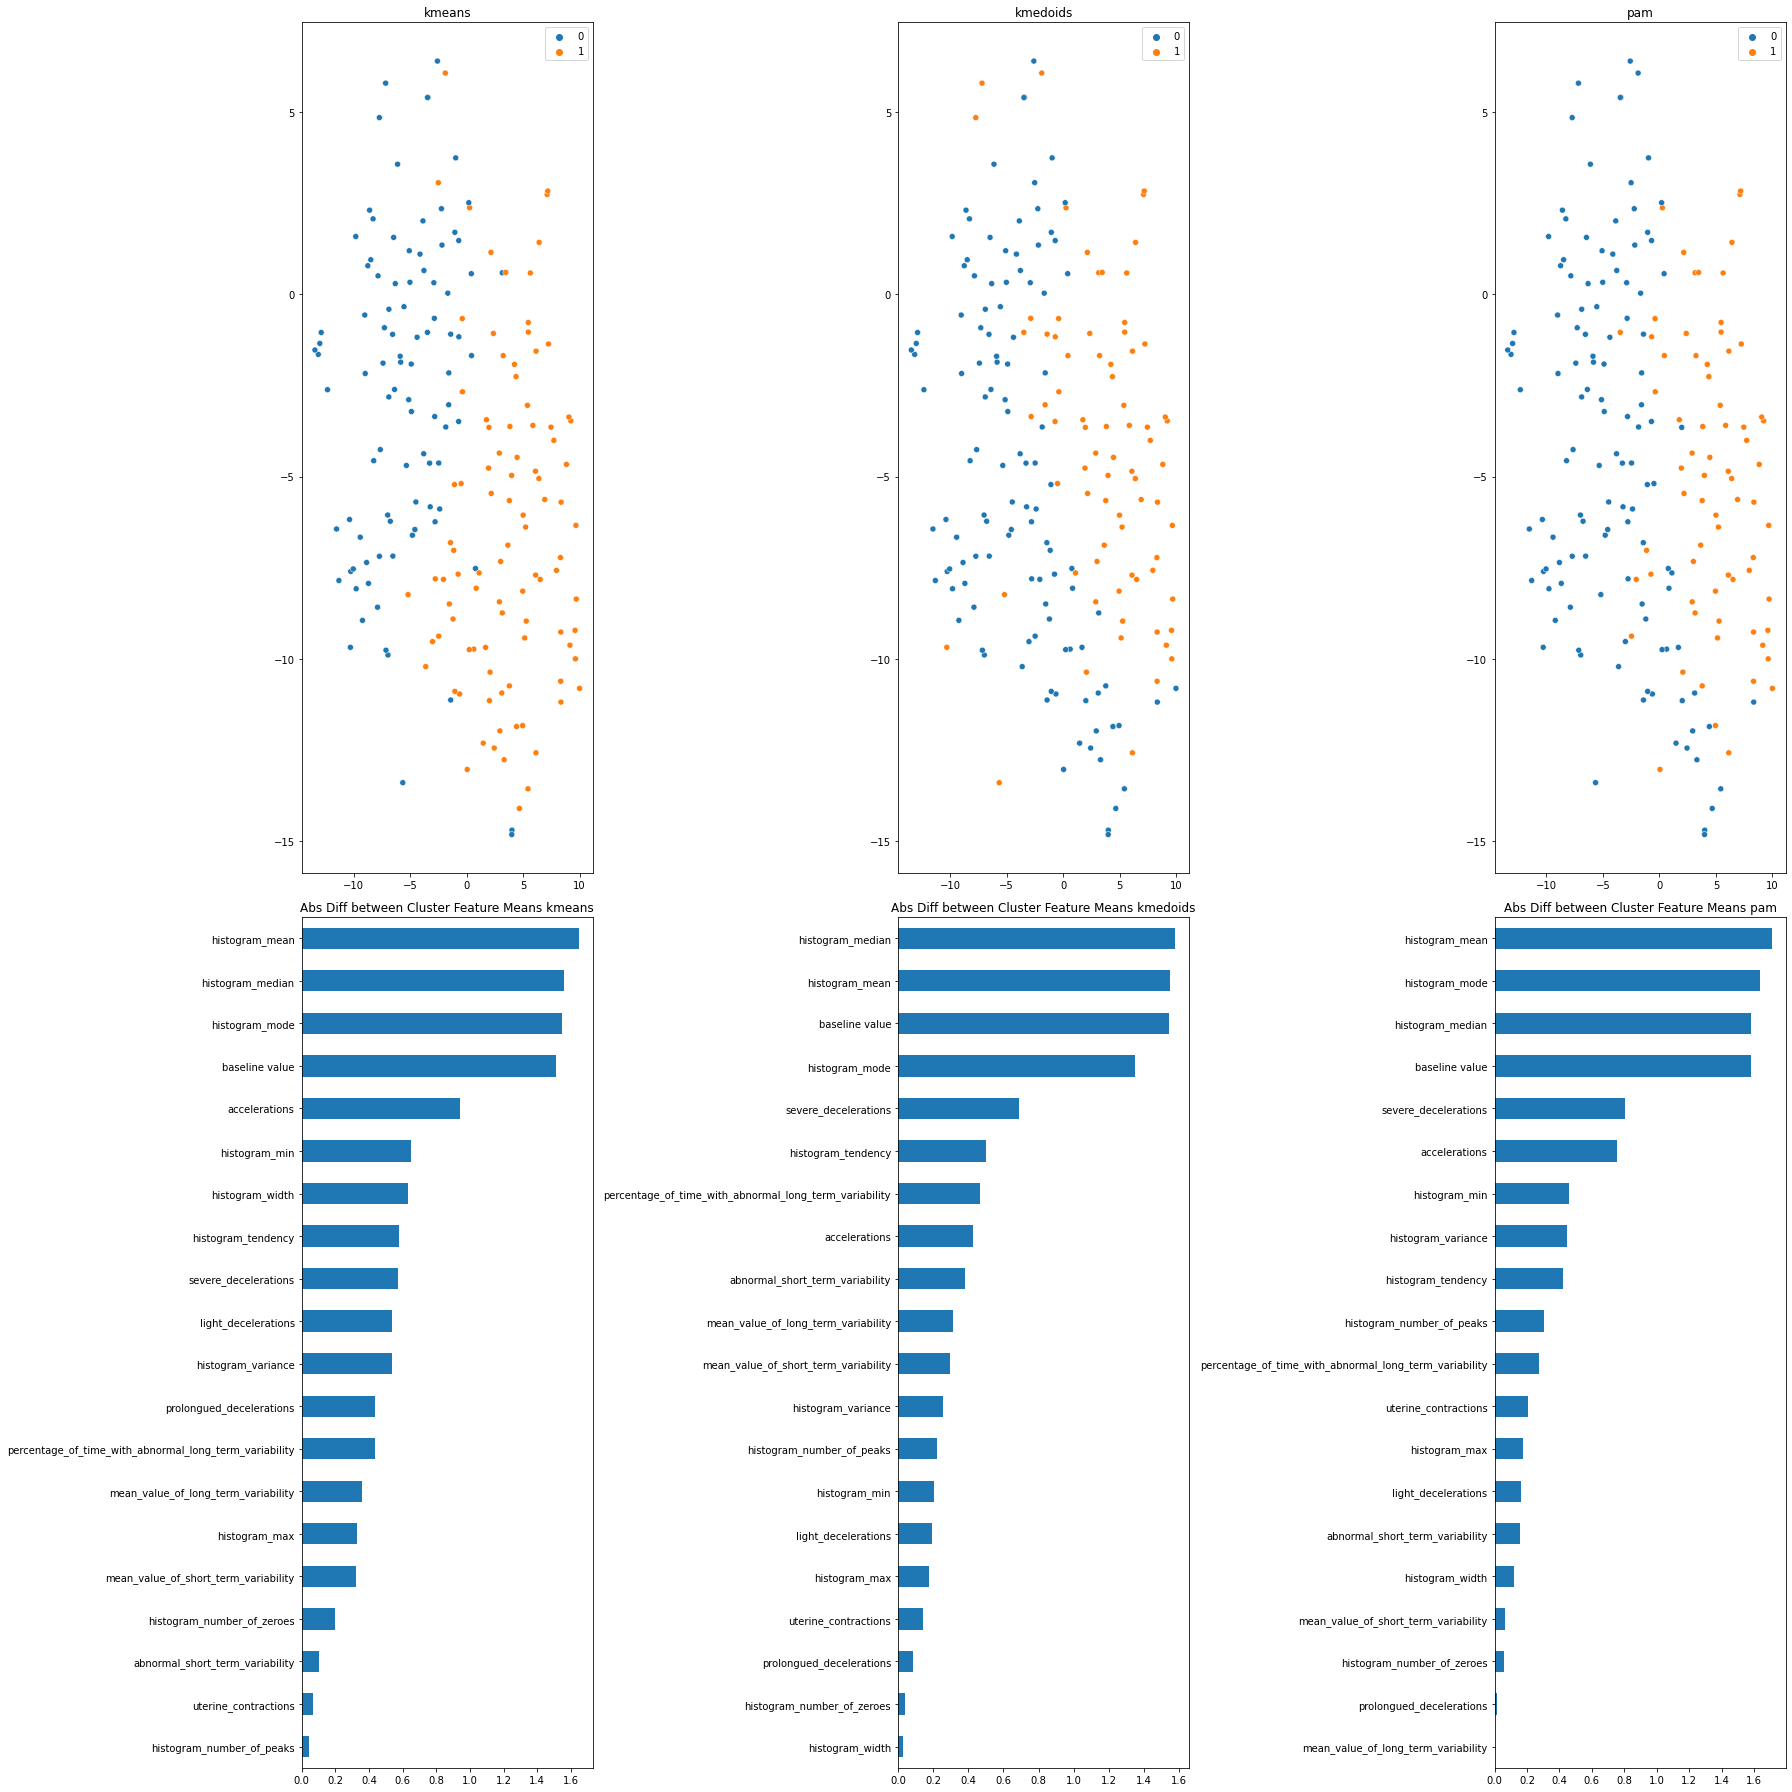

In [156]:
# Test agreements between Tsne clustering result and partition based clustering results.
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,25))

algs = ['kmeans', 'kmedoids', 'pam']
models = [KMeans(n_clusters=2), KMedoids(n_clusters=2, random_state=0), KMedoids(n_clusters=2, method='pam', random_state=0)]
plt.title("Partition Clustering Projected on Tsne")
for i, alg in enumerate(algs):
    model = models[i]
    model.fit(X_p)
    labels = model.labels_
    X_tsne = TSNE(random_state=105).fit_transform(X_p)
    x_p = np.array(X_tsne[:,0])
    y_p = np.array(X_tsne[:,1])
    sns.scatterplot(x= x_p, y = y_p, hue = labels, ax= axs[0][i])
    axs[0][i].title.set_text(alg)
    
    X1 = X_p[labels == 0]
    X2 = X_p[labels == 1]
    diffs = abs(X1.mean(0) - X2.mean(0))
    diffs = pd.Series(diffs, index = X_data.columns).sort_values()
    ax = axs[1][i]
    diffs.plot.barh(y='ABS of Means', ax = axs[1][i])
    axs[1][i].title.set_text("Abs Diff between Cluster Feature Means " + alg)
fig.tight_layout()
plt.show()

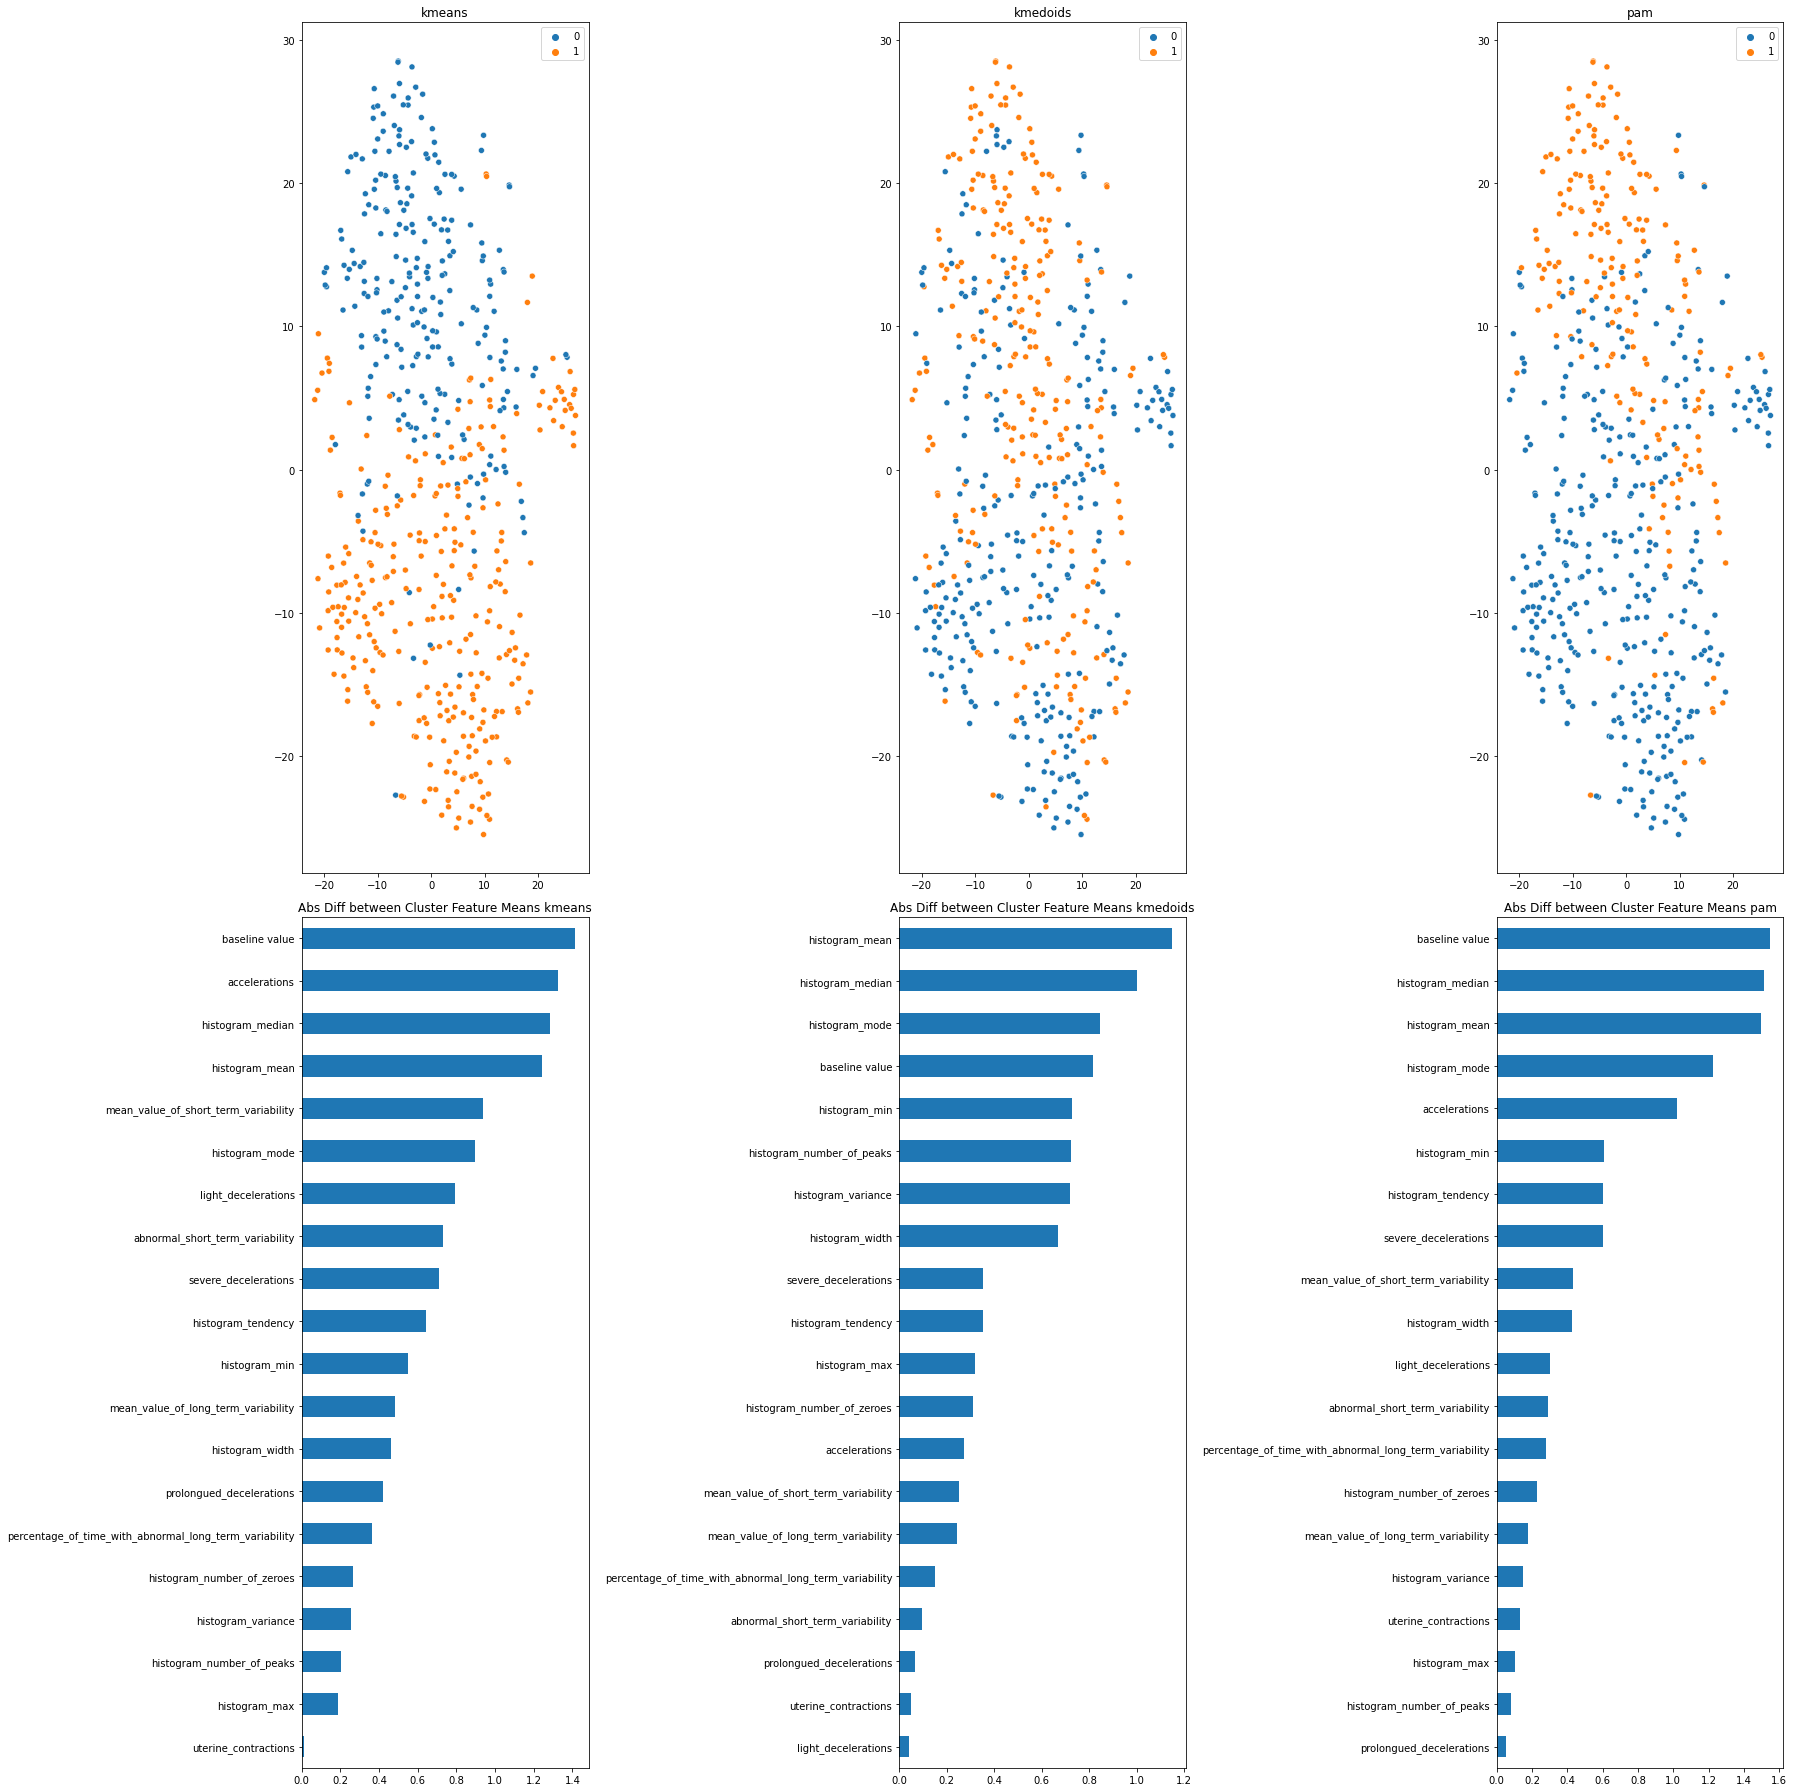

In [160]:
def plot_tsne(algs, models, X, columns):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,25))
    plt.title("Partition Clustering Projected on Tsne")
    for i, alg in enumerate(algs):
        model = models[i]
        model.fit(X)
        labels = model.labels_
        X_tsne = TSNE(random_state=105).fit_transform(X)
        x_p = np.array(X_tsne[:,0])
        y_p = np.array(X_tsne[:,1])
        sns.scatterplot(x= x_p, y = y_p, hue = labels, ax= axs[0][i])
        axs[0][i].title.set_text(alg)

        X1 = X[labels == 0]
        X2 = X[labels == 1]
        diffs = abs(X1.mean(0) - X2.mean(0))
        diffs = pd.Series(diffs, index = columns).sort_values()
        ax = axs[1][i]
        diffs.plot.barh(y='ABS of Means', ax = axs[1][i])
        axs[1][i].title.set_text("Abs Diff between Cluster Feature Means " + alg)
    fig.tight_layout()
    plt.show()
algs = ['kmeans', 'kmedoids', 'pam']
models = [KMeans(n_clusters=2), KMedoids(n_clusters=2, random_state=0), KMedoids(n_clusters=2, method='pam', random_state=0)]
plot_tsne(algs, models, X, X_data.columns)


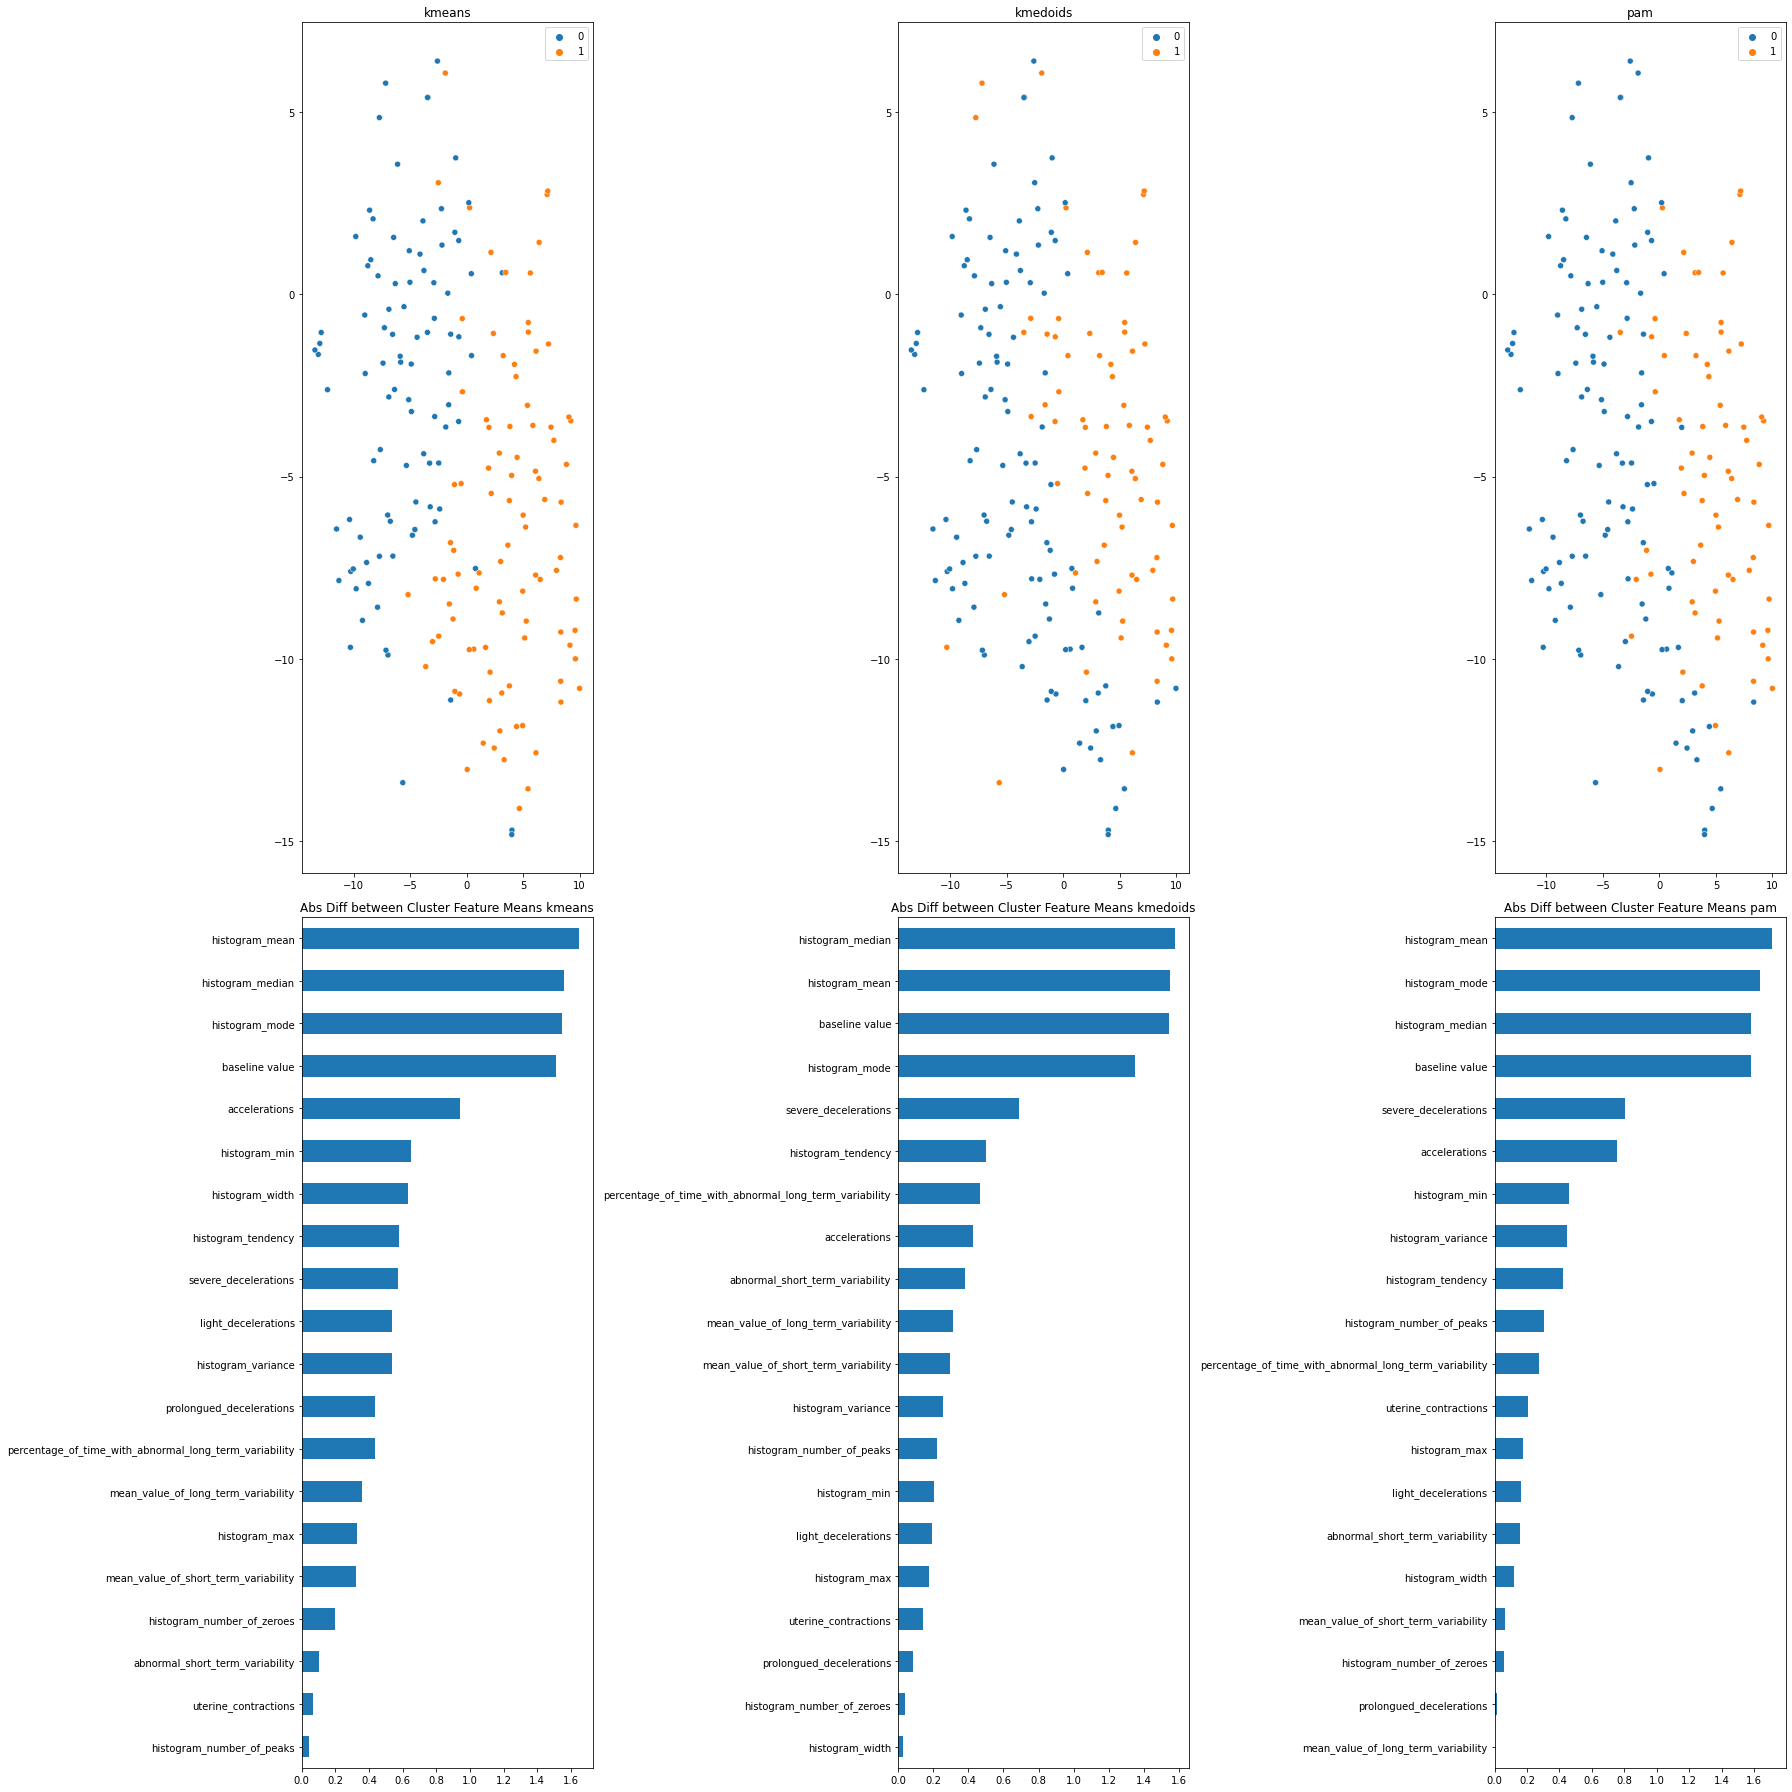

In [162]:
algs = ['kmeans', 'kmedoids', 'pam']
models = [KMeans(n_clusters=2), KMedoids(n_clusters=2, random_state=0), KMedoids(n_clusters=2, method='pam', random_state=0)]
plot_tsne(algs, models, X_p, X_data.columns)

In [154]:
X_p = X[y=='Pathological', :]

In [159]:
X_p.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [124]:
y_p = y[y == 'Pathological']

In [155]:
X_p

array([[-0.03284603,  0.60070684,  0.74354299, ...,  0.09462909,
         0.60374617, -0.64268032],
       [ 1.41504094, -1.6309481 , -1.74384252, ...,  0.17722552,
         0.52880294, -0.64268032],
       [ 0.36203223, -0.31710443, -1.38845939, ...,  0.17722552,
         0.21191595, -0.64268032],
       ...,
       [ 2.79711486, -0.45181083, -0.01984316, ...,  3.23329351,
        -1.56533295, -0.64268032],
       [ 1.48085398, -0.56972455, -0.59841717, ...,  1.45747022,
        -1.59790708,  0.99104909],
       [-0.8884156 , -0.09806965,  1.06253287, ..., -1.30951025,
         0.20099041, -0.64268032]])

In [120]:
y.unique()

array(['Pathological', 'Normal', 'Suspect'], dtype=object)

In [82]:
data["Deliv. type"]

0      1
1      1
2      1
3      1
4      1
      ..
539    2
540    2
541    2
542    2
543    2
Name: Deliv. type, Length: 544, dtype: int64

In [86]:
data.columns[38]

'Pyrexia'

In [126]:
labels = ['Pathological', 'Normal', 'Suspect']